# Feature Selection on Maternal Risk Dataset

#### First we will import all the necessary files for our data preprocessing and feature correlation

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r'MaternalHealthRisk.csv')
df.head()

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0   25      71.6         130           80  15.0         86   
1   35      86.4         140           90  13.0         70   
2   29      57.3          90           70   8.0         80   
3   30      81.0         140           85   7.0         70   
4   35      47.7         120           60   6.1         76   

   Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                  91        98.0        36.7  high risk  
1                  96        98.0        36.7  high risk  
2                  98       100.0        37.8  high risk  
3                  94        98.0        36.7  high risk  
4                  98        98.0        36.7   low risk

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1014 non-null   int64  
 1   WeightKG            1014 non-null   float64
 2   SystolicBP          1014 non-null   int64  
 3   DiastolicBP         1014 non-null   int64  
 4   BS                  1014 non-null   float64
 5   HeartRate           1014 non-null   int64  
 6   Blood_oxygen_level  1014 non-null   int64  
 7   BodyTemp_F          1014 non-null   float64
 8   BodyTemp_C          1014 non-null   float64
 9   RiskLevel           1014 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 79.3+ KB


#### We can see that no column has any NaN values

In [4]:
df.isna().sum()

Age                   0
WeightKG              0
SystolicBP            0
DiastolicBP           0
BS                    0
HeartRate             0
Blood_oxygen_level    0
BodyTemp_F            0
BodyTemp_C            0
RiskLevel             0
dtype: int64

In [5]:
df.RiskLevel

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

In [6]:
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

#### Now we will rename our target column values to 'low risk':1, 'mid risk': 2, 'high risk': 3

In [7]:
df['RiskLevel'] = df['RiskLevel'].replace({'low risk':1, 'mid risk': 2, 'high risk': 3})
df['RiskLevel']= df['RiskLevel'].astype('int')
df.head()

Age  WeightKG  SystolicBP  DiastolicBP    BS  HeartRate  \
0   25      71.6         130           80  15.0         86   
1   35      86.4         140           90  13.0         70   
2   29      57.3          90           70   8.0         80   
3   30      81.0         140           85   7.0         70   
4   35      47.7         120           60   6.1         76   

   Blood_oxygen_level  BodyTemp_F  BodyTemp_C  RiskLevel  
0                  91        98.0        36.7          3  
1                  96        98.0        36.7          3  
2                  98       100.0        37.8          3  
3                  94        98.0        36.7          3  
4                  98        98.0        36.7          1

In [8]:
df.RiskLevel.value_counts()

1    406
2    336
3    272
Name: RiskLevel, dtype: int64

## We have completed the data pre-processing part, now we will look at the most relevant features
- Pairwise plots
- Feature Corellation Matrix
- Chi Squred test

#### We do not understand much from the pairwise plotting 

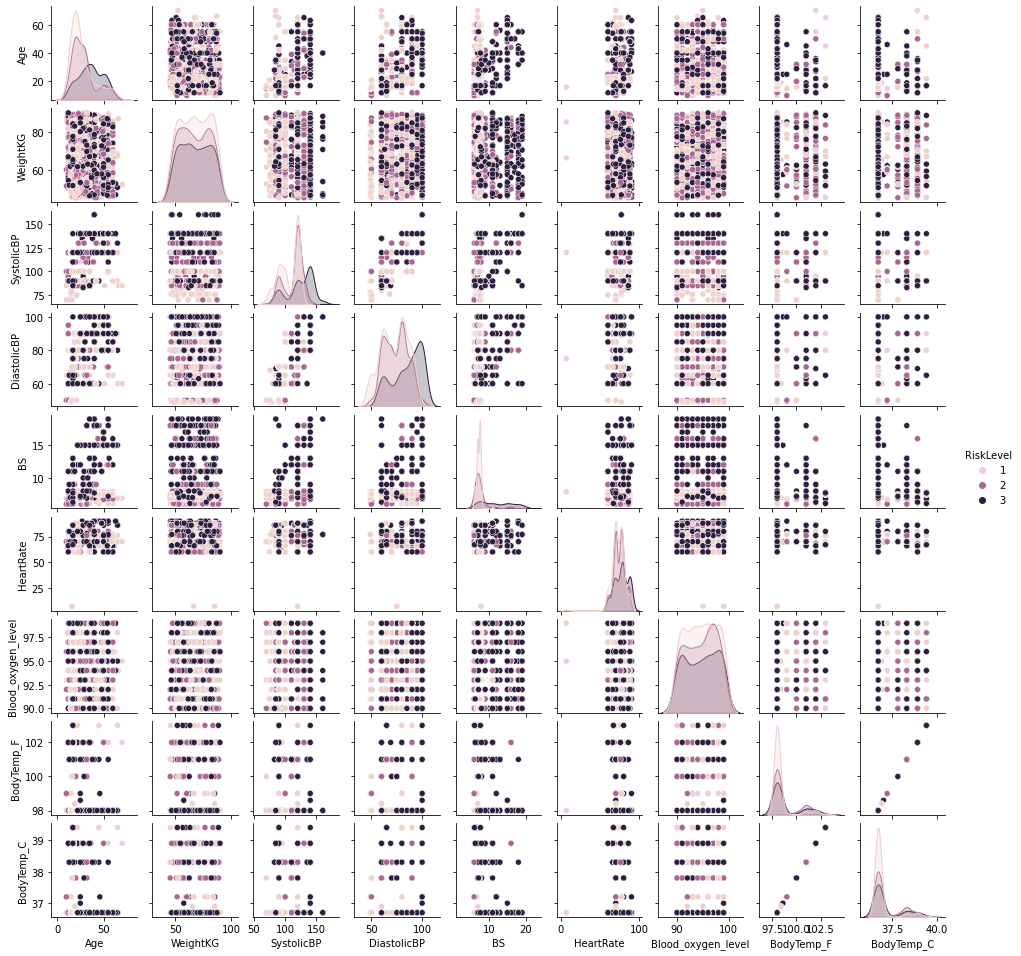

In [9]:
sns.pairplot(df,height=1.5,hue='RiskLevel')

#### We can not see or understand much from the above plot so we will try 2 correlation matrix methods

<AxesSubplot:>

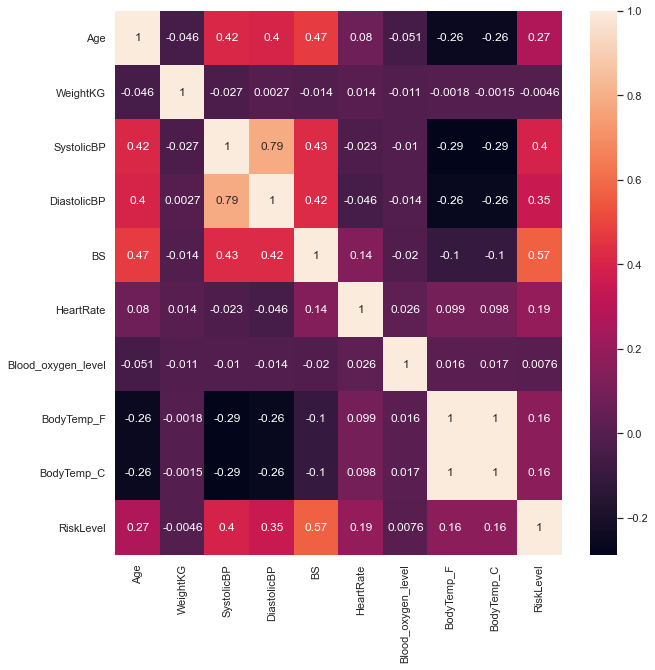

In [10]:
sns.set(rc={"figure.figsize":(10, 10)})
#using pandas.dataframe.corr
sns.heatmap(df.corr(method ='pearson'), annot=True)

<AxesSubplot:>

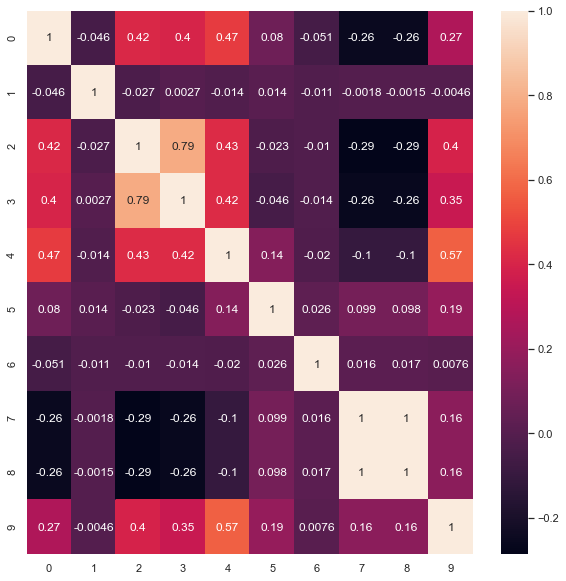

In [11]:
#using np.corrcoef
corelation = np.corrcoef(df, rowvar=False)
sns.heatmap(corelation, annot=True)

#### We see that the risk level is highly correlated to 
- Blood Sugar
- SystolicBP
- DiastolicBP
- Age

## Blood Sugar

In [12]:
fig = px.box(df, x="BS", points='all',width=800, height=200)
fig.show()

In [13]:
print('Blood Sugar min: {BS}'.format(BS = df['BS'].min()))
print('Blood Sugar max: {BS}'.format(BS = df['BS'].max()))
print('Blood Sugar avg: {BS}'.format(BS = df['BS'].mean()))
print('Blood Sugar median: {BS}'.format(BS = df['BS'].median()))
print('Blood Sugar std: {BS}'.format(BS = df['BS'].std()))

Blood Sugar min: 6.0
Blood Sugar max: 19.0
Blood Sugar avg: 8.725986193293886
Blood Sugar median: 7.5
Blood Sugar std: 3.293531721151271


In [14]:
data = df[['BS']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='BS', y='Count')
fig.show()

## SystolicBP

In [15]:
fig = px.box(df, x="SystolicBP", points='all',width=800, height=200)
fig.show()

In [16]:
print('SystolicBP min: {SystolicBP}'.format(SystolicBP = df['SystolicBP'].min()))
print('SystolicBP max: {SystolicBP}'.format(SystolicBP = df['SystolicBP'].max()))
print('SystolicBP avg: {SystolicBP}'.format(SystolicBP = df['SystolicBP'].mean()))
print('SystolicBP median: {SystolicBP}'.format(SystolicBP = df['SystolicBP'].median()))
print('SystolicBP std: {SystolicBP}'.format(SystolicBP = df['SystolicBP'].std()))

SystolicBP min: 70
SystolicBP max: 160
SystolicBP avg: 113.19822485207101
SystolicBP median: 120.0
SystolicBP std: 18.403912756342805


In [17]:
data = df[['SystolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='SystolicBP', y='Count')
fig.show()

## DiastolicBP

In [18]:
fig = px.box(df, x="DiastolicBP", points='all',width=800, height=200)
fig.show()

In [19]:
print('DiastolicBP min: {DiastolicBP}'.format(DiastolicBP = df['DiastolicBP'].min()))
print('DiastolicBP max: {DiastolicBP}'.format(DiastolicBP = df['DiastolicBP'].max()))
print('DiastolicBP avg: {DiastolicBP}'.format(DiastolicBP = df['DiastolicBP'].mean()))
print('DiastolicBP median: {DiastolicBP}'.format(DiastolicBP = df['DiastolicBP'].median()))
print('DiastolicBP std: {DiastolicBP}'.format(DiastolicBP = df['DiastolicBP'].std()))

DiastolicBP min: 49
DiastolicBP max: 100
DiastolicBP avg: 76.46055226824457
DiastolicBP median: 80.0
DiastolicBP std: 13.885795724160682


In [20]:
data = df[['SystolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='SystolicBP', y='Count')
fig.show()

## Age

In [21]:
fig = px.box(df, x="Age", points='all',width=800, height=200)
fig.show()

In [22]:
print('Age min: {Age}'.format(Age = df['Age'].min()))
print('Age max: {Age}'.format(Age = df['Age'].max()))
print('Age avg: {Age}'.format(Age = df['Age'].mean()))
print('Age median: {Age}'.format(Age = df['Age'].median()))
print('Age std: {Age}'.format(Age = df['Age'].std()))

Age min: 10
Age max: 70
Age avg: 29.871794871794872
Age median: 26.0
Age std: 13.474385532634383


In [23]:
data = df[['Age']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='Age', y='Count')
fig.show()

### Chi Squared test

In [24]:
# Keep top k categorical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k=9
fs = SelectKBest(score_func=chi2, k=k)
X_train = df.drop(['RiskLevel'], axis=1)
y = df.RiskLevel
fit = fs.fit(X_train, y)
fit.scores_
print("These are fit scores from lowest to highest:" ,sorted(fit.scores_))
X_new=fs.fit_transform(X_train, y)


# Plot features by importance
fig, ax = plt.subplots(figsize=(400,200))
sns.barplot(y=['BS','SystolicBP','DiastolicBP', 'Age','HeartRate','WeightKG', 'BodyTemp_F','BodyTemp_C','Blood_oxygen_level'][:k],x=sorted(fit.scores_, reverse=True)[:k]).set(xlim=(0, 550))
plt.title("Chi-Square Scores for the Different Features", fontsize=450)
plt.ylabel("Feature", fontsize=450)
plt.xlabel("Chi-Score", fontsize=450)
plt.xticks(fontsize=450)
plt.yticks(fontsize=450)
plt.show()



These are fit scores from lowest to highest: [0.01045116842740522, 0.4731828559762231, 0.6084082793899562, 1.0014853490376205, 34.68738909935138, 367.5683963391306, 483.3442747637981, 498.43205531002684, 514.7112027147698]


#### We can see that Blood Sugar, SystolicBP, DiastolicBP and Age are the most important features. HeartRate is also important. Other than this the other features have no importance for our target feature

### Now we will run our code on 8 ML models

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [34]:
X = df.drop(['RiskLevel'], axis=1)
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

((811, 9), (203, 9))

In [35]:
#Scale the X dataset
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [58]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(random_state=SEED),
    ensemble.RandomForestClassifier(random_state=SEED),
    
    #GLM
    linear_model.SGDClassifier(random_state=SEED),
    linear_model.LogisticRegression(random_state=SEED),

    #Trees    
    tree.DecisionTreeClassifier(random_state=SEED),
    tree.ExtraTreeClassifier(random_state=SEED),

    XGBClassifier(eval_metric="mlogloss", use_label_encoder=True),
    CatBoostClassifier(silent=True,random_state=SEED)  
]

#### We first will see the Precision, Recall, Accuracy, F-scores, etc for all of our models

In [59]:
MLA_compare = pd.DataFrame()

#Function for MLA append to dataframe
def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
        MLA_compare.loc[row_index, 'F-score Accuracy'] = f1_score(y_test, y_pred, average='micro')*100
        print(classifier)
        print(classification_report(y_test,y_pred))
        print("******************************************************************************************")
        print("******************************************************************************************")
   
       # print(MLA_name, "Done")
        row_index+=1

In [60]:
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)

GradientBoostingClassifier(random_state=1)
              precision    recall  f1-score   support

           1       0.35      0.55      0.42        77
           2       0.29      0.24      0.26        63
           3       0.32      0.16      0.21        63

    accuracy                           0.33       203
   macro avg       0.32      0.31      0.30       203
weighted avg       0.32      0.33      0.31       203

******************************************************************************************
******************************************************************************************
RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           1       0.36      0.38      0.37        77
           2       0.33      0.41      0.36        63
           3       0.24      0.16      0.19        63

    accuracy                           0.32       203
   macro avg       0.31      0.32      0.31       203
weighted avg       0.31      

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\A

LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           1       0.42      0.92      0.58        77
           2       0.29      0.16      0.20        63
           3       0.00      0.00      0.00        63

    accuracy                           0.40       203
   macro avg       0.24      0.36      0.26       203
weighted avg       0.25      0.40      0.28       203

******************************************************************************************
******************************************************************************************
DecisionTreeClassifier(random_state=1)
              precision    recall  f1-score   support

           1       0.40      0.45      0.42        77
           2       0.36      0.40      0.38        63
           3       0.36      0.25      0.30        63

    accuracy                           0.37       203
   macro avg       0.37      0.37      0.37       203
weighted avg       0.37      0.37    

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
              precision    recall  f1-score   support

           1       0.42      0.52      0.46        77
           2       0.40      0.43      0.41        63
           3       0.28      0.17      0.22        63

    accuracy                           0.38       203
   macro avg       0

## Now we will see the accuracy, f-scores of our models

### All 9 features

In [48]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

MLA Name  Accuracy Score  K-Fold Accuracy  \
0      DecisionTreeClassifier       82.758621        75.710629   
1      RandomForestClassifier       79.310345        77.691960   
2         ExtraTreeClassifier       77.832512        67.570009   
3          CatBoostClassifier       77.339901        73.742849   
4               XGBClassifier       76.847291        73.989762   
5  GradientBoostingClassifier       75.862069        74.730503   
6          LogisticRegression       58.128079        62.512797   
7               SGDClassifier       49.261084        54.620596   

   F-score Accuracy  
0         82.758621  
1         79.310345  
2         77.832512  
3         77.339901  
4         76.847291  
5         75.862069  
6         58.128079  
7         49.261084

In [49]:
MLA_compare = pd.DataFrame()

#Function for MLA append to dataframe
def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
        MLA_compare.loc[row_index, 'F-score Accuracy'] = f1_score(y_test, y_pred, average='micro')*100
   
       # print(MLA_name, "Done")
        row_index+=1

### Top 4 features (BS, Age, DiastolicBP, and SystolicBP)

In [50]:
# making the new data-frame
X = df.drop(["WeightKG" , "HeartRate" , "Blood_oxygen_level" , "BodyTemp_F" , "BodyTemp_C" , "RiskLevel"], axis=1) 
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

# scaling and transforming the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# fitting on various ML models
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

MLA Name  Accuracy Score  K-Fold Accuracy  \
0      RandomForestClassifier       86.206897        82.613671   
1      DecisionTreeClassifier       85.221675        81.260163   
2               XGBClassifier       85.221675        82.371274   
3         ExtraTreeClassifier       82.266010        81.260163   
4          CatBoostClassifier       82.266010        82.366757   
5  GradientBoostingClassifier       76.354680        78.925023   
6               SGDClassifier       59.605911        56.227040   
7          LogisticRegression       58.128079        57.339657   

   F-score Accuracy  
0         86.206897  
1         85.221675  
2         85.221675  
3         82.266010  
4         82.266010  
5         76.354680  
6         59.605911  
7         58.128079

### Top 5 features (BS, Age, DiastolicBP, SystolicBP, and HeartRate)

In [53]:
# making the new data-frame
X = df.drop(["WeightKG", "Blood_oxygen_level" , "BodyTemp_F" , "BodyTemp_C" , "RiskLevel"], axis=1) 
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

# scaling and transforming the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# fitting on various ML models
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

MLA Name  Accuracy Score  K-Fold Accuracy  \
0          CatBoostClassifier       87.684729        81.386631   
1               XGBClassifier       86.699507        83.236977   
2      RandomForestClassifier       85.714286        82.741644   
3      DecisionTreeClassifier       85.714286        81.753990   
4         ExtraTreeClassifier       84.729064        80.769347   
5  GradientBoostingClassifier       78.817734        78.303222   
6          LogisticRegression       59.605911        60.663957   
7               SGDClassifier       50.738916        56.717856   

   F-score Accuracy  
0         87.684729  
1         86.699507  
2         85.714286  
3         85.714286  
4         84.729064  
5         78.817734  
6         59.605911  
7         50.738916

### Top 6 features (BS, Age, DiastolicBP, SystolicBP, HeartRate, and WeightKg)

In [54]:
# making the new data-frame
X = df.drop(["Blood_oxygen_level" , "BodyTemp_F" , "BodyTemp_C" , "RiskLevel"], axis=1) 
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

# scaling and transforming the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# fitting on various ML models
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

MLA Name  Accuracy Score  K-Fold Accuracy  \
0      RandomForestClassifier       81.773399        78.547124   
1               XGBClassifier       79.310345        75.965071   
2      DecisionTreeClassifier       77.832512        72.633243   
3  GradientBoostingClassifier       76.847291        75.837097   
4         ExtraTreeClassifier       76.847291        73.733815   
5          CatBoostClassifier       76.847291        76.332430   
6          LogisticRegression       58.128079        60.665462   
7               SGDClassifier       54.187192        52.416441   

   F-score Accuracy  
0         81.773399  
1         79.310345  
2         77.832512  
3         76.847291  
4         76.847291  
5         76.847291  
6         58.128079  
7         54.187192

### Top 6 features (BS, Age, DiastolicBP, SystolicBP, HeartRate, and Blood_Oxygen_Level)

In [55]:
# making the new data-frame
X = df.drop(["WeightKG", "BodyTemp_F" , "BodyTemp_C" , "RiskLevel"], axis=1) 
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

# scaling and transforming the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# fitting on various ML models
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

MLA Name  Accuracy Score  K-Fold Accuracy  \
0      RandomForestClassifier       79.802956        78.919000   
1               XGBClassifier       79.310345        76.832279   
2      DecisionTreeClassifier       78.817734        75.715146   
3  GradientBoostingClassifier       78.325123        77.071665   
4          CatBoostClassifier       77.832512        74.361638   
5         ExtraTreeClassifier       72.906404        69.173442   
6               SGDClassifier       60.591133        57.952424   
7          LogisticRegression       57.635468        60.048178   

   F-score Accuracy  
0         79.802956  
1         79.310345  
2         78.817734  
3         78.325123  
4         77.832512  
5         72.906404  
6         60.591133  
7         57.635468

### Bottom 4 features (Weight, Body_Temp_F, Body_Temp_C, and Blood_Oxygen_Level)

In [56]:
# making the new data-frame
X = df.drop(["Age", "SystolicBP", "DiastolicBP", "BS", "HeartRate", "RiskLevel"], axis=1) 
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

# scaling and transforming the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# fitting on various ML models
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_e

MLA Name  Accuracy Score  K-Fold Accuracy  \
0          LogisticRegression       39.901478        46.120145   
1               XGBClassifier       38.423645        40.078290   
2      DecisionTreeClassifier       37.438424        36.871424   
3          CatBoostClassifier       37.438424        39.829871   
4               SGDClassifier       35.467980        36.616983   
5         ExtraTreeClassifier       33.990148        36.994881   
6  GradientBoostingClassifier       33.004926        41.555254   
7      RandomForestClassifier       32.019704        36.382114   

   F-score Accuracy  
0         39.901478  
1         38.423645  
2         37.438424  
3         37.438424  
4         35.467980  
5         33.990148  
6         33.004926  
7         32.019704